<a href="https://colab.research.google.com/github/kurokawa5/kaggle_practice/blob/main/titanic/kaggle_titanic_079186.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [98]:
train=pd.read_csv('/content/drive/MyDrive/05_workspace/05_kaggle/01_titanic/titanic/train.csv')
test=pd.read_csv('/content/drive/MyDrive/05_workspace/05_kaggle/01_titanic/titanic/test.csv')

In [99]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
train= pd.read_csv('/content/drive/MyDrive/05_workspace/05_kaggle/01_titanic/titanic/train.csv').replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
test= pd.read_csv('/content/drive/MyDrive/05_workspace/05_kaggle/01_titanic/titanic/test.csv').replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)

In [102]:
train["Age"].fillna(train.Age.mean(), inplace=True) 
train["Embarked"].fillna(train.Embarked.mean(), inplace=True)

In [103]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [105]:
combine1 = [train]

In [106]:
for train in combine1: 
    train['Salutation'] = train.Name.str.extract(' ([A-Za-z]+).', expand=False) 

In [107]:
for train in combine1: 
    train['Salutation'] = train['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    train['Salutation'] = train['Salutation'].replace('Mlle', 'Miss')
    train['Salutation'] = train['Salutation'].replace('Ms', 'Miss')
    train['Salutation'] = train['Salutation'].replace('Mme', 'Mrs')
    del train['Name']

In [108]:
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
Salutation_mapping

{'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}

In [109]:
train['Salutation'].map(Salutation_mapping) 

0      1.0
1      3.0
2      2.0
3      3.0
4      1.0
      ... 
886    5.0
887    2.0
888    2.0
889    1.0
890    1.0
Name: Salutation, Length: 891, dtype: float64

In [110]:
for train in combine1: 
    train['Salutation'] = train['Salutation'].map(Salutation_mapping) 
    train['Salutation'] = train['Salutation'].fillna(0)

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    float64
 11  Salutation   891 non-null    float64
dtypes: float64(4), int64(6), object(2)
memory usage: 83.7+ KB


In [112]:
 train['Ticket'].apply(lambda x: str(x)[0:2])

0      A/
1      PC
2      ST
3      11
4      37
       ..
886    21
887    11
888    W.
889    11
890    37
Name: Ticket, Length: 891, dtype: object

In [113]:
for train in combine1: 
    train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])
    train['Ticket_Lett'] = train['Ticket_Lett'].apply(lambda x: str(x)) 
    train['Ticket_Lett'] = np.where((train['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), train['Ticket_Lett'], np.where((train['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
    train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x)) 
    del train['Ticket'] 
train['Ticket_Lett']=train['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3)

In [114]:
for train in combine1: 
    train['Cabin_Lett'] = train['Cabin'].apply(lambda x: str(x)[0]) 
    train['Cabin_Lett'] = train['Cabin_Lett'].apply(lambda x: str(x)) 
    train['Cabin_Lett'] = np.where((train['Cabin_Lett']).isin([ 'F', 'E', 'D', 'C', 'B', 'A']),train['Cabin_Lett'], np.where((train['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0'))
del train['Cabin'] 
train['Cabin_Lett']=train['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1)

In [115]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett
0,1,0,3,0,22.000000,1,0,7.2500,0.0,1.0,3,9,0
1,2,1,1,1,38.000000,1,0,71.2833,1.0,3.0,0,8,1
2,3,1,3,1,26.000000,0,0,7.9250,0.0,2.0,3,16,0
3,4,1,1,1,35.000000,1,0,53.1000,0.0,3.0,1,6,1
4,5,0,3,0,35.000000,0,0,8.0500,0.0,1.0,3,6,0
5,6,0,3,0,29.699118,0,0,8.4583,2.0,1.0,3,6,0
6,7,0,1,0,54.000000,0,0,51.8625,0.0,1.0,1,5,2
7,8,0,3,0,2.000000,3,1,21.0750,0.0,4.0,3,6,0
8,9,1,3,1,27.000000,0,2,11.1333,0.0,3.0,3,6,0
9,10,1,2,1,14.000000,1,0,30.0708,1.0,3.0,2,6,0


In [116]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
for train in combine1:
    train['IsAlone'] = 0
    train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

In [117]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett,FamilySize,IsAlone
0,1,0,3,0,22.0,1,0,7.2500,0.0,1.0,3,9,0,2,0
1,2,1,1,1,38.0,1,0,71.2833,1.0,3.0,0,8,1,2,0
2,3,1,3,1,26.0,0,0,7.9250,0.0,2.0,3,16,0,1,1
3,4,1,1,1,35.0,1,0,53.1000,0.0,3.0,1,6,1,2,0
4,5,0,3,0,35.0,0,0,8.0500,0.0,1.0,3,6,0,1,1


In [118]:
train_data = train.values
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ

In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [120]:
test["Age"].fillna(train.Age.mean(), inplace=True)
test["Fare"].fillna(train.Fare.mean(), inplace=True)

In [121]:
combine = [test]
for test in combine:
    test['Salutation'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
for test in combine:
    test['Salutation'] = test['Salutation'].replace(['Lady', 'Countess','Capt', 'Col',\
         'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    test['Salutation'] = test['Salutation'].replace('Mlle', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Ms', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Mme', 'Mrs')
    del test['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for test in combine:
    test['Salutation'] = test['Salutation'].map(Salutation_mapping)
    test['Salutation'] = test['Salutation'].fillna(0)

In [122]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,892,3,0,34.500000,0,0,330911,7.8292,NaN,2,1
1,893,3,1,47.000000,1,0,363272,7.0000,NaN,0,3
2,894,2,0,62.000000,0,0,240276,9.6875,NaN,2,1
3,895,3,0,27.000000,0,0,315154,8.6625,NaN,0,1
4,896,3,1,22.000000,1,1,3101298,12.2875,NaN,0,3
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,29.699118,0,0,A.5. 3236,8.0500,NaN,0,1
414,1306,1,1,39.000000,0,0,PC 17758,108.9000,C105,1,5
415,1307,3,0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1
416,1308,3,0,29.699118,0,0,359309,8.0500,NaN,0,1


In [123]:
for test in combine:
        test['Ticket_Lett'] = test['Ticket'].apply(lambda x: str(x)[0])
        test['Ticket_Lett'] = test['Ticket_Lett'].apply(lambda x: str(x))
        test['Ticket_Lett'] = np.where((test['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), test['Ticket_Lett'],
                                   np.where((test['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0', '0'))
        test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))
        del test['Ticket']
test['Ticket_Lett']=test['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 

In [124]:
for test in combine:
        test['Cabin_Lett'] = test['Cabin'].apply(lambda x: str(x)[0])
        test['Cabin_Lett'] = test['Cabin_Lett'].apply(lambda x: str(x))
        test['Cabin_Lett'] = np.where((test['Cabin_Lett']).isin(['T', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),test['Cabin_Lett'],
                                   np.where((test['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0','0'))        
        del test['Cabin']
test['Cabin_Lett']=test['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1).replace("G",1) 

In [125]:
test["FamilySize"] = train["SibSp"] + train["Parch"] + 1

In [126]:
for test in combine:
    test['IsAlone'] = 0
    test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

In [127]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett,FamilySize,IsAlone
0,892,3,0,34.500000,0,0,7.8292,2,1,3,6,0,2,0
1,893,3,1,47.000000,1,0,7.0000,0,3,3,6,0,2,0
2,894,2,0,62.000000,0,0,9.6875,2,1,2,6,0,1,1
3,895,3,0,27.000000,0,0,8.6625,0,1,3,6,0,2,0
4,896,3,1,22.000000,1,1,12.2875,0,3,3,7,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,29.699118,0,0,8.0500,0,1,3,9,0,1,1
414,1306,1,1,39.000000,0,0,108.9000,1,5,0,8,1,1,1
415,1307,3,0,38.500000,0,0,7.2500,0,1,3,18,0,1,1
416,1308,3,0,29.699118,0,0,8.0500,0,1,3,6,0,3,0


In [128]:
test_data = test.values
xs_test = test_data[:, 1:]
xs_test

array([[ 3.        ,  0.        , 34.5       , ...,  0.        ,
         2.        ,  0.        ],
       [ 3.        ,  1.        , 47.        , ...,  0.        ,
         2.        ,  0.        ],
       [ 2.        ,  0.        , 62.        , ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 3.        ,  0.        , 38.5       , ...,  0.        ,
         1.        ,  1.        ],
       [ 3.        ,  0.        , 29.69911765, ...,  0.        ,
         3.        ,  0.        ],
       [ 3.        ,  0.        , 29.69911765, ...,  0.        ,
         3.        ,  0.        ]])

In [149]:
from sklearn.ensemble import RandomForestClassifier

#random_forest=RandomForestClassifier()
random_forest=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
random_forest.fit(xs, y)
Y_pred = random_forest.predict(xs_test)

In [150]:
import csv
with open("/content/drive/MyDrive/05_workspace/05_kaggle/01_titanic/titanic/output/predict_result_data_3.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), Y_pred.astype(int)):
        writer.writerow([pid, survived])

In [131]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn import grid_search
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve, GridSearchCV

In [148]:
"""
parameters = {
        'n_estimators'      : [10,25,50,75,100],
        'random_state'      : [0],
        'n_jobs'            : [4],
        'min_samples_split' : [5,10, 15, 20,25, 30],
        'max_depth'         : [5, 10, 15,20,25,30]
}

clf = GridSearchCV(RandomForestClassifier(), parameters)
clf.fit(xs, y)
 
print(clf.best_estimator_)


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=75,
                       n_jobs=4, random_state=0)
"""

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=75,
                       n_jobs=4, random_state=0)


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


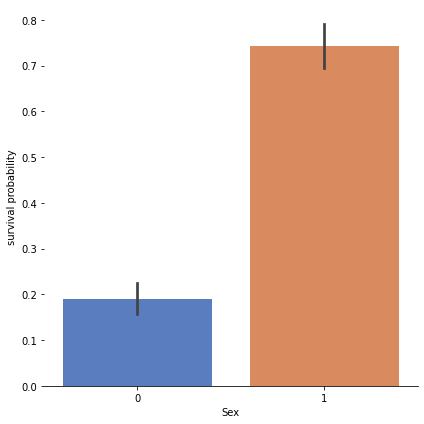

In [133]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.factorplot(x="Sex", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

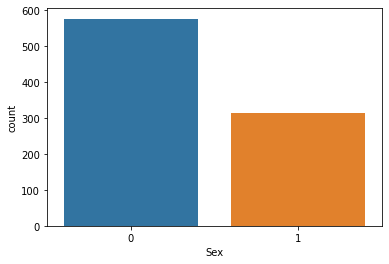

In [134]:
sns.countplot(x='Sex', data = train)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


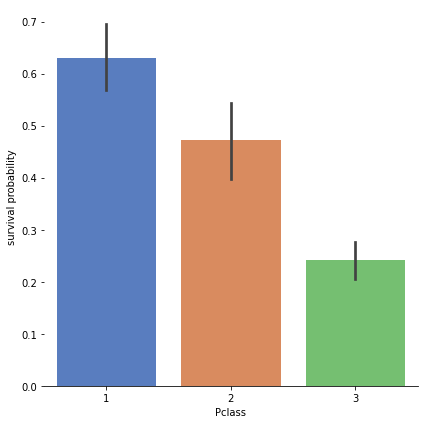

In [135]:
g = sns.factorplot(x="Pclass",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


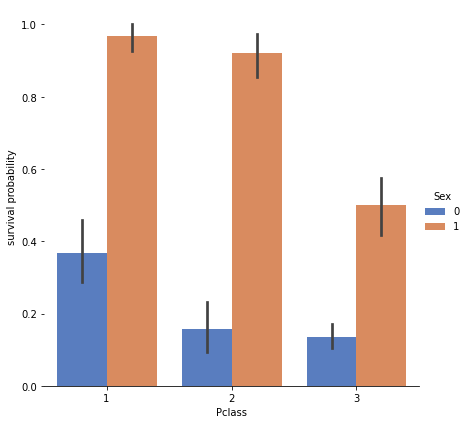

In [136]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


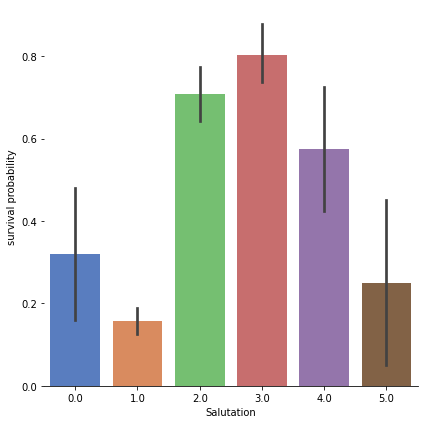

In [137]:
g = sns.factorplot(x="Salutation", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

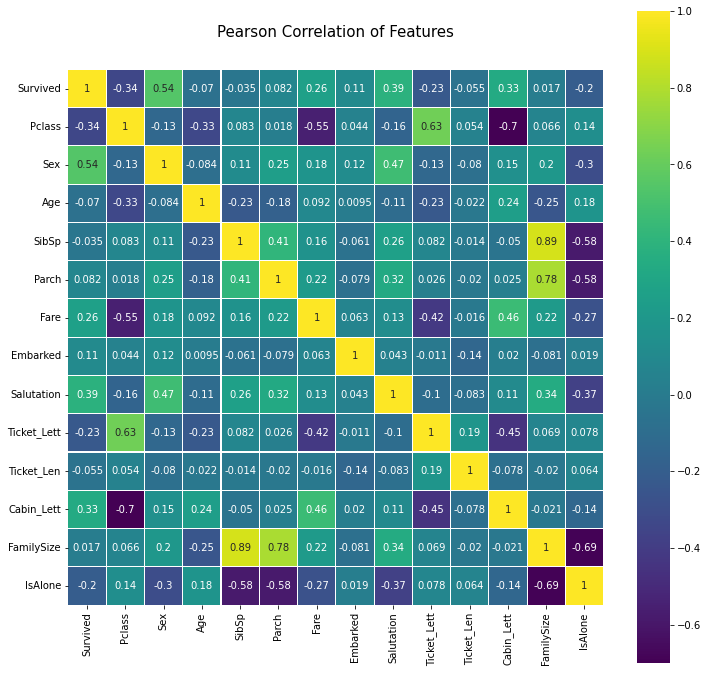

In [138]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
del train['PassengerId']
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

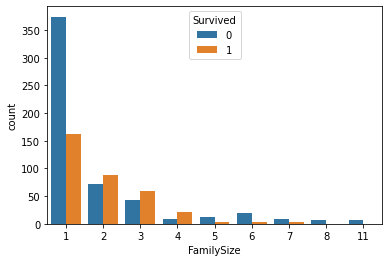

In [139]:
sns.countplot(x='FamilySize', data = train, hue = 'Survived')

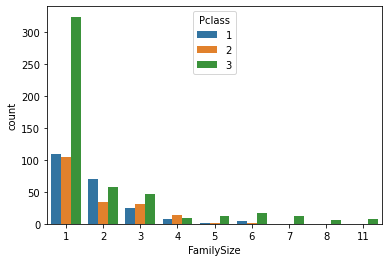

In [140]:
sns.countplot(x='FamilySize', data = train,hue = 'Pclass')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


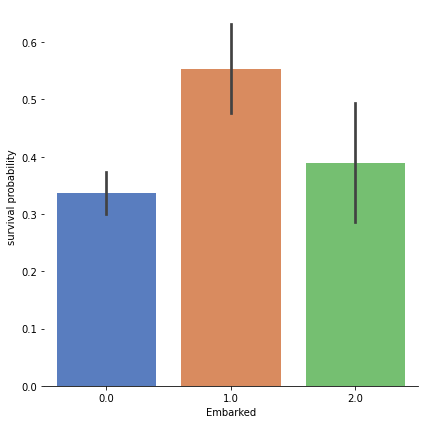

In [141]:
t=pd.read_csv("/content/drive/MyDrive/05_workspace/05_kaggle/01_titanic/titanic/train.csv").replace("S",0).replace("C",1).replace("Q",2)
train['Embarked']= t['Embarked']
g = sns.factorplot(x="Embarked", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

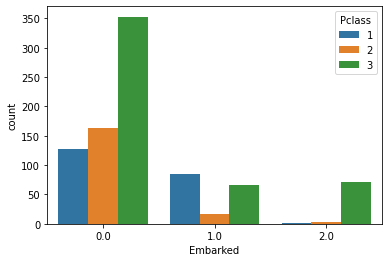

In [142]:
sns.countplot(x='Embarked', data = train,hue = 'Pclass')

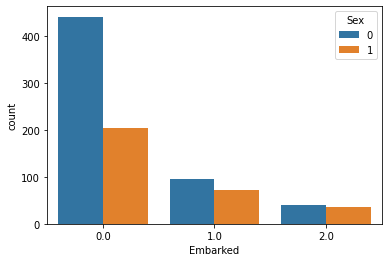

In [143]:
sns.countplot(x='Embarked', data = train,hue = 'Sex')

<Figure size 432x288 with 0 Axes>

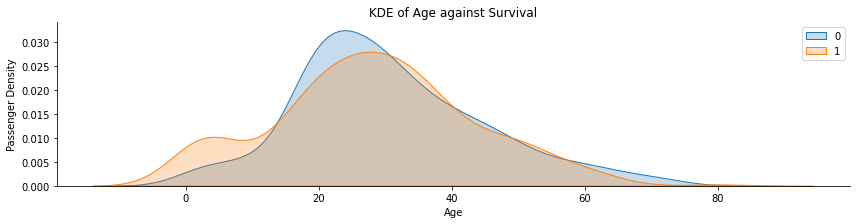

In [144]:
plt.figure()
sns.FacetGrid(data=t, hue="Survived", aspect=4).map(sns.kdeplot, "Age", shade=True)
plt.ylabel('Passenger Density')
plt.title('KDE of Age against Survival')
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


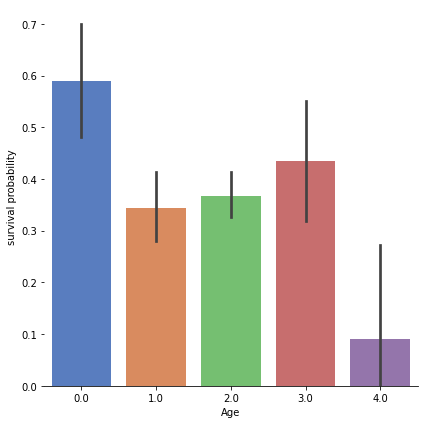

In [145]:
for t in combine1: 
    t.loc[ t['Age'] <= 15, 'Age']                                                = 0
    t.loc[(t['Age'] > 15) & (t['Age'] <= 25), 'Age'] = 1
    t.loc[(t['Age'] > 25) & (t['Age'] <= 48), 'Age'] = 2
    t.loc[(t['Age'] > 48) & (t['Age'] <= 64), 'Age'] = 3
    t.loc[ t['Age'] > 64, 'Age'] =4
g = sns.factorplot(x="Age", y="Survived",  data=t,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

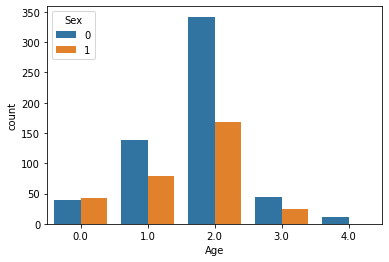

In [146]:
sns.countplot(x='Age', data = t,hue = 'Sex')

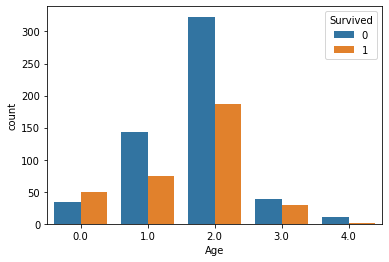

In [147]:
sns.countplot(x='Age', data = t,hue = 'Survived')

[KaggleチュートリアルTitanicで上位3%以内に入るには。](https://lp-tech.net/articles/0QUUd)